### Demo notebook
This notebook provides an example use of a ProtoSSDML trained ViT-S, trained only on the normal WSIs of CAMELYON16's training set.

Most of the logic is encapsulated in the demo class `WSIAnalyzer`.

You need to install all dependencies and download the model weights and example support set embeddings to run this notebook. You also need the CAMELYON16 dataset.

In [ ]:
# Import dependencies

from lib.adapter import get_protossdml_encoder
from lib.wsi_analysis.wsi_analyzer import WSIAnalyzer

In [2]:
model, transform = get_protossdml_encoder("./checkpoint_c16.pth")

# Use demo class
analyzer = WSIAnalyzer(model=model, transform=transform, device="cuda")

|2025-05-13|10:07:42.155| [WARNING] /home/travail/repos/protossdml/lib/adapter.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(checkpoint, map_locatio

WSI Analyser ready to accept slides.


|2025-05-13|10:08:09.615| [WARNING] Metadata: Objective power inferred from microns-per-pixel (MPP).


28,760 patches of size 224x224 generated from /store2/travail/data/CAMELYON16/images/test_071.tif at resolution power 20
1,845 patches within anomalous regions


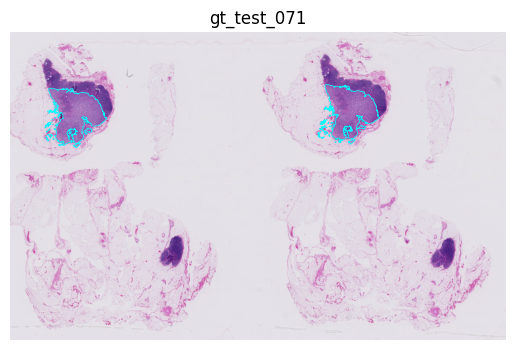

In [3]:
# Set test WSI from CAMELYON16
CAMELYON_PATH = "/store2/travail/data/CAMELYON16"
name = "test_071"
analyzer.set_wsi(wsi_path=f"{CAMELYON_PATH}/images/{name}.tif",
                patch_size=224,
                resolution=20,
                annotations_paths=[f"{CAMELYON_PATH}/annotations/{name}.xml"],
                annotations_type="camelyon_xml",
)

# Show thumbnail image
analyzer.generate_thumbnail_img(include_annotations=True)

Projecting patches to texture space: 100%|██████████| 225/225 [00:22<00:00, 10.22it/s]


Queries shape: (6, 384)


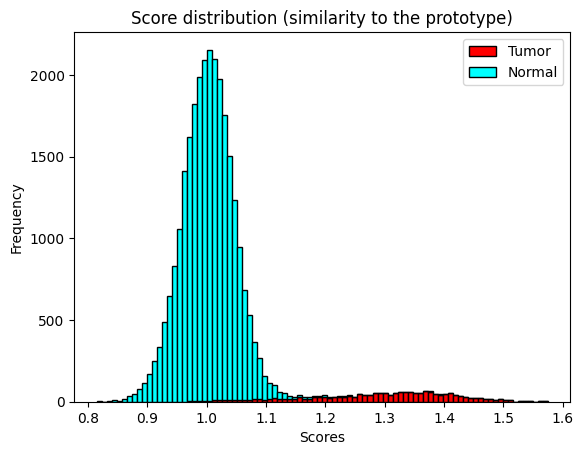

In [4]:
# Project all tissue patches to encoder representation space
analyzer.preprocess()
# Load support set from provided file (support set 0 from low-data zero shot evaluation).
# This support set was generated using CAMELYON16 these tumor slides: [015, 066, 047, 031, 101, 049]
analyzer.load_support_set_from_file("./embeddings_tumor_0.npz")
# Compute cosine similarity between prototype and individual patch embeddings
analyzer.analyse()

0.8148171912059256 1.5752020400147448


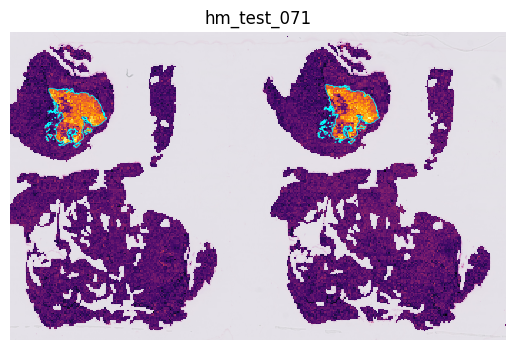

In [5]:
# Show result image
analyzer.generate_heatmap(propagated=False, include_annotations=True)

GENERATING ADJACENCY GRAPH
Generated graph with 28,760 nodes and 120,194 edges
0.008181045102704778 0.9854362981772004


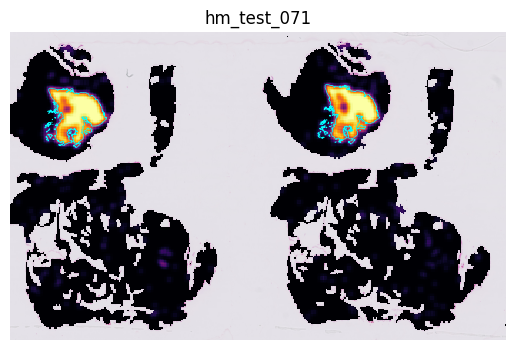

In [6]:
# Run Post-Processing
analyzer.post_process(alpha=0.99, steps=3, threshold=1.1)

# Show result image
analyzer.generate_heatmap(propagated=True, include_annotations=True)